# Plot scatter plot of the data

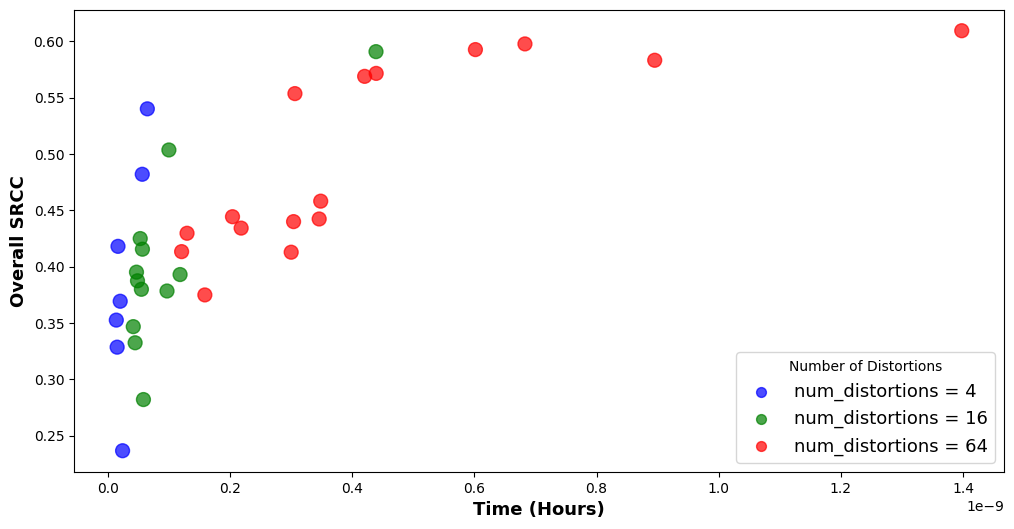

In [292]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('csv/cls.csv')

# Convert 'Relative Time (Process)' to hours and minutes
df['Relative Time (Process)'] = pd.to_timedelta(df['Relative Time (Process)'])
df['Time (Hours)'] = df['Relative Time (Process)'].dt.total_seconds() / 3600

# Filter data to remove outliers
#df = df[(df['Time (Hours)'] <= 4) & (df['overall_srocc'] <= 0.55)]

# Define fixed colors for different num_distortions
color_map = {4: 'blue', 16: 'green', 64: 'red'}
colors = df['num_distortions'].map(color_map)

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Time (Hours)'], df['overall_srocc'], c=colors, alpha=0.7, s=100)

# Add labels and title
plt.xlabel('Time (Hours)', fontsize=13, fontweight='bold')
plt.ylabel('Overall SRCC', fontsize=13, fontweight='bold')
#plt.title('Overall SRCC for XGB Classifier and MLP Classifier with Different Numbers of Distortions', fontsize=15)

# Add legend
for num_distortion, color in color_map.items():
    plt.scatter([], [], c=color, alpha=0.7, label=f'num_distortions = {num_distortion}', s=50)
plt.legend(title='Number of Distortions')

# Set axis limits
#plt.xlim(0, 3*10**-10)
#plt.ylim(0.55, df.overall_srocc.max()+0.01)

plt.legend(title='Number of Distortions', loc='lower right', fontsize=13)
plt.show()


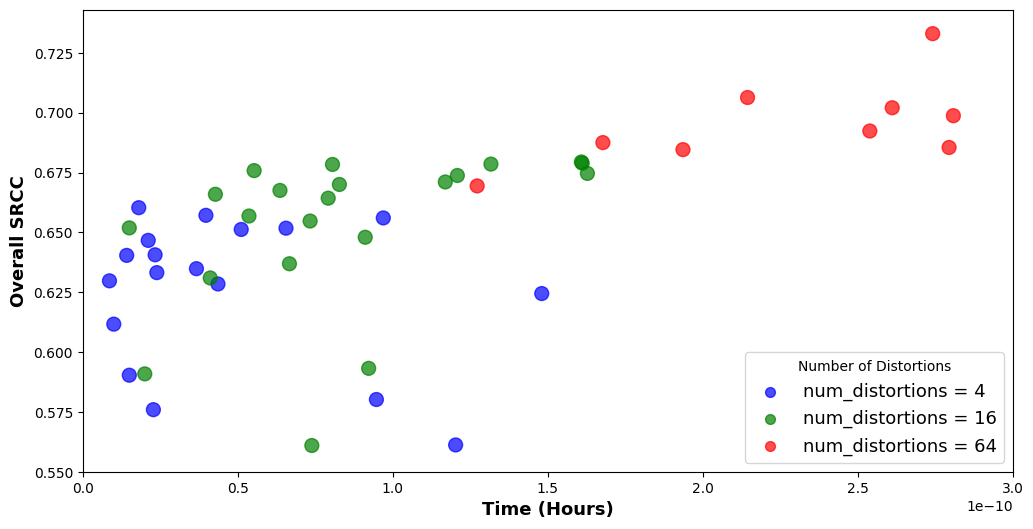

In [293]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('reg.csv')

# Convert 'Relative Time (Process)' to hours and minutes
df['Relative Time (Process)'] = pd.to_timedelta(df['Relative Time (Process)'])
df['Time (Hours)'] = df['Relative Time (Process)'].dt.total_seconds() / 3600

# Filter data to remove outliers
#df = df[(df['Time (Hours)'] <= 4) & (df['overall_srocc'] <= 0.55)]

# Define fixed colors for different num_distortions
color_map = {4: 'blue', 16: 'green', 64: 'red'}
colors = df['num_distortions'].map(color_map)

# Create the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Time (Hours)'], df['overall_srocc'], c=colors, alpha=0.7, s=100)

# Add labels and title
plt.xlabel('Time (Hours)', fontsize=13, fontweight='bold')
plt.ylabel('Overall SRCC', fontsize=13, fontweight='bold')
#plt.title('Overall SRCC for XGB Regressor and MLP Regressor with Different Numbers of Distortions', fontsize=15)

# Add legend
for num_distortion, color in color_map.items():
    plt.scatter([], [], c=color, alpha=0.7, label=f'num_distortions = {num_distortion}', s=50)
plt.legend(title='Number of Distortions')

# Set axis limits
plt.xlim(0, 3*10**-10)
plt.ylim(0.55, df.overall_srocc.max()+0.01)

plt.legend(title='Number of Distortions', loc='lower right', fontsize=13)
plt.show()


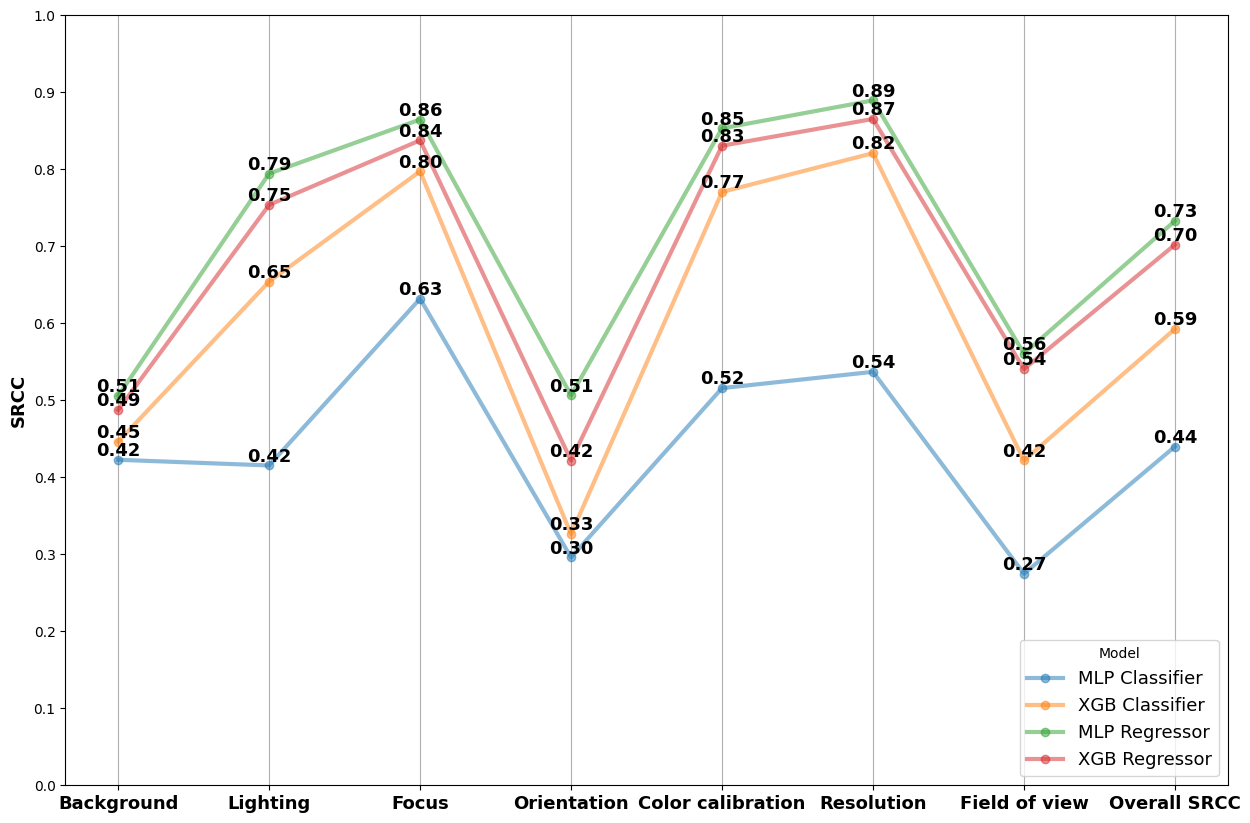

In [295]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('srcc.csv')

# Define the order and names of the pillars
pillar_names = ["Background", "Lighting", "Focus", "Orientation", "Color calibration", "Resolution", "Field of view", "Overall SRCC"]

df['Name'] = df['Name'].replace({
    'Final_mlp_cls': 'MLP Classifier',
    'Final_xgb_cls': 'XGB Classifier',
    'Final_mlp_reg': 'MLP Regressor',
    'Final_xgb_reg': 'XGB Regressor'
})

# Plot the parallel coordinates
plt.figure(figsize=(15, 10))

# Create the parallel coordinates plot
for i, row in df.iterrows():
    plt.plot(pillar_names, row[1:], marker='o', linestyle='-', alpha=0.5, label=row['Name'], linewidth=3)
    # round the SRCC values to 2 decimal places and display them next to the points
    for j, value in enumerate(row[1:]):
        plt.text(pillar_names[j], value, f'{value:.2f}', horizontalalignment='center', verticalalignment='bottom', fontsize=13, fontweight='bold')

plt.xticks(range(len(pillar_names)), pillar_names, fontsize=13, fontweight='bold')
plt.yticks(np.linspace(0, 1, 11))  # Set y-axis from 0 to 1 with ticks at every 0.1
plt.ylim(0, 1)  # Ensure y-axis ranges from 0 to 1
plt.ylabel('SRCC', fontsize=13, fontweight='bold')
#plt.title('SRCC Scores Across Different Criteria and the Overall SRCC', fontsize=15)
plt.grid(axis='y', linestyle='')

plt.legend(title='Model', loc='lower right', fontsize=13)
plt.grid(True)
plt.show()


# Create datasets distribution radar chart plots

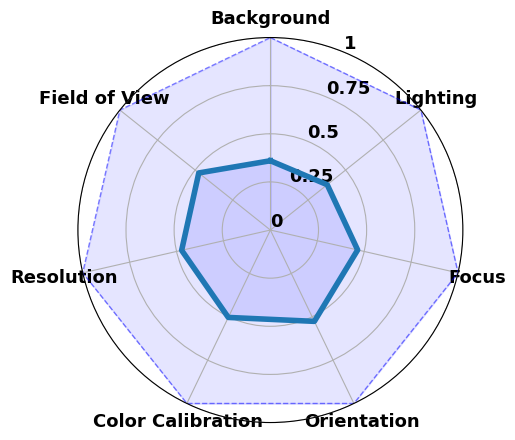

In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_means_and_stds(csv_path):
    df = pd.read_csv(csv_path)
    # mean_values = df.iloc[:, :-1].median()
    # max_values = df.iloc[:, :-1].max()
    mean_values = df.median()
    max_values = df.max()
    return mean_values, max_values

def plot_radar_chart_with_std(mean_values, max_values):
    criteria_names = ["Background", "Lighting", "Focus", "Orientation", "Color Calibration", "Resolution", "Field of View"]
    num_criteria = len(criteria_names)
    angles = np.linspace(0, 2 * np.pi, num_criteria, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    values = mean_values.tolist()
    values += values[:1]  # Complete the loop

    upper_bound = max_values.tolist()
    upper_bound += upper_bound[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], criteria_names, fontsize=13, fontweight='bold')

    ax.set_ylim(0, 1)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=13, fontweight='bold')

    # Plot the mean values
    ax.plot(angles, values, linewidth=4, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)

    ax.plot(angles, upper_bound, linewidth=1, linestyle='dashed', color='blue', alpha=0.5)
    #ax.plot(angles, upper_bound, linewidth=1, linestyle='dashed', color='blue', alpha=0.5)
    ax.fill_between(angles, upper_bound, color='blue', alpha=0.1)

    #plt.legend(loc='lower left', fontsize=13, bbox_to_anchor=(-0.2, 0.1))

    plt.show()

scin_csv_path = 'comb.csv'
mean_values, max_values = calculate_means_and_stds(scin_csv_path)
plot_radar_chart_with_std(mean_values, max_values)


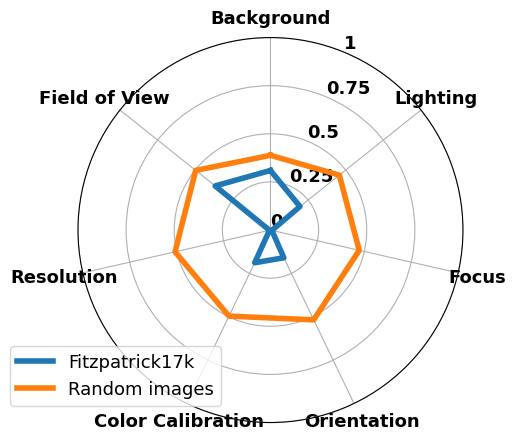

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_means(csv_path):
    df = pd.read_csv(csv_path)
    mean_values = df.iloc[:, :-1].mean()
    return mean_values

def calculate_means_feats(csv_path):
    df = pd.read_csv(csv_path)
    mean_values = df.mean()
    return mean_values

def calculate_min(csv_path):
    df = pd.read_csv(csv_path)
    mean_values = df.iloc[:, :-1].min()
    return mean_values

def calculate_max(csv_path):
    df = pd.read_csv(csv_path)
    mean_values = df.iloc[:, :-1].max()
    return mean_values

def plot_radar_chart_with_std(m1, m2, m3):
    criteria_names = ["Background", "Lighting", "Focus", "Orientation", "Color Calibration", "Resolution", "Field of View"]
    num_criteria = len(criteria_names)
    angles = np.linspace(0, 2 * np.pi, num_criteria, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    values = m1.tolist()
    values += values[:1]  # Complete the loop

    values2 = m2.tolist()
    values2 += values2[:1]  # Complete the loop

    values3 = m3.tolist()
    values3 += values3[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    plt.xticks(angles[:-1], criteria_names, fontsize=13, fontweight='bold')

    ax.set_ylim(0, 1)
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticklabels(['0', '0.25', '0.5', '0.75', '1'], fontsize=13, fontweight='bold')

    # Plot the mean values
    #ax.plot(angles, values, linewidth=3, linestyle='solid', label='SCIN')
    # here i want to show in blue the good quality images and in red the synthetic images
    ax.plot(angles, values2, linewidth=4, linestyle='solid', label='Fitzpatrick17k')
    ax.plot(angles, values3, linewidth=4, linestyle='solid', label='Random images')

    #ax.fill(angles, values, 'b', alpha=0.1)

    plt.legend(loc='lower left', fontsize=13, bbox_to_anchor=(-0.2, 0.02))

    plt.show()

path1 = 'SCIN.csv'
path2 = 'combined.csv'
path3 = 'comb.csv'

scin_means1 = calculate_max(path1)
scin_means2 = calculate_means(path2)
scin_means3 = calculate_means_feats(path3)

plot_radar_chart_with_std(scin_means1, scin_means2, scin_means3)

# Loss Curves

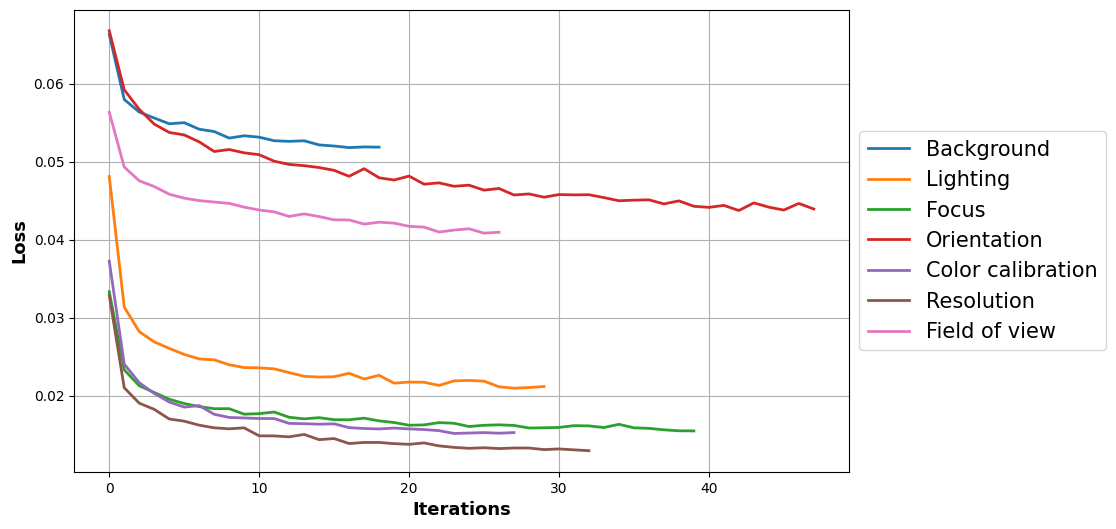

In [2]:
import pickle
import matplotlib.pyplot as plt

with open("../models/combined_mlp_reg.pkl", "rb") as f:
    mlp = pickle.load(f)

def plot_loss_curve(multioutput_regressor):
    criteria_names = ["Background", "Lighting", "Focus", "Orientation", "Color calibration", "Resolution", "Field of view"]
    plt.figure(figsize=(10, 6))
    for idx, estimator in enumerate(multioutput_regressor.estimators_):
        if hasattr(estimator, 'loss_curve_'):
            plt.plot(estimator.loss_curve_, label=f'{criteria_names[idx]}', linewidth=2)
    plt.xlabel('Iterations', fontsize=13, fontweight='bold')
    plt.ylabel('Loss', fontsize=13, fontweight='bold')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
    plt.grid(True)
    plt.show()

plot_loss_curve(mlp)

# Weighted Average for one quality score

In [19]:
import pandas as pd
import numpy as np


actual = np.load('../datas/test_70/embeddings/scores.npy')
df1 = pd.read_csv('../src/csv/test_70_ssim.csv')
df2 = pd.read_csv('../src/csv/test_70_ARNIQA.csv')
df3 = pd.read_csv('../src/csv/test_70_pred.csv')
df4 = pd.merge(df1, df2, left_on='distorted_image_path', right_on='image_path')
df = pd.merge(df4, df3, on='image_path')

synthetic = df[['background', 'lighting', 'focus', 'orientation', 'color_calibration', 'resolution', 'field_of_view']]
ssim = df['SSIM']
arniqa = df['quality_score']

import numpy as np

def weighted_average_with_emphasis(scores):
    # Define multipliers for the distortions
    multipliers = np.array([0.5, 1, 1.5, 0.5, 1, 1.5, 0.5])  # Adjust these values as needed

    # Apply the multipliers to the scores
    adjusted_scores = scores * multipliers
    
    # Calculate weights based on the adjusted severity scores
    weights = adjusted_scores ** 2  
    sum_weights = weights.sum()
    
    if sum_weights == 0:
        return 0  # or you can choose another default value
    
    weights /= sum_weights
    return np.dot(weights, adjusted_scores)

# weighted average score
def weighted_average_with_emphasis1(scores):
    weights = scores ** 2  # weights based on severity
    sum_weights = weights.sum()
    
    if sum_weights == 0:
        return 0  # or you can choose another default value
    
    weights /= sum_weights
    return np.dot(weights, scores)

actual_scores = np.apply_along_axis(weighted_average_with_emphasis1, 1, actual)
synthetic_scores = synthetic.apply(lambda row: weighted_average_with_emphasis(row), axis=1)

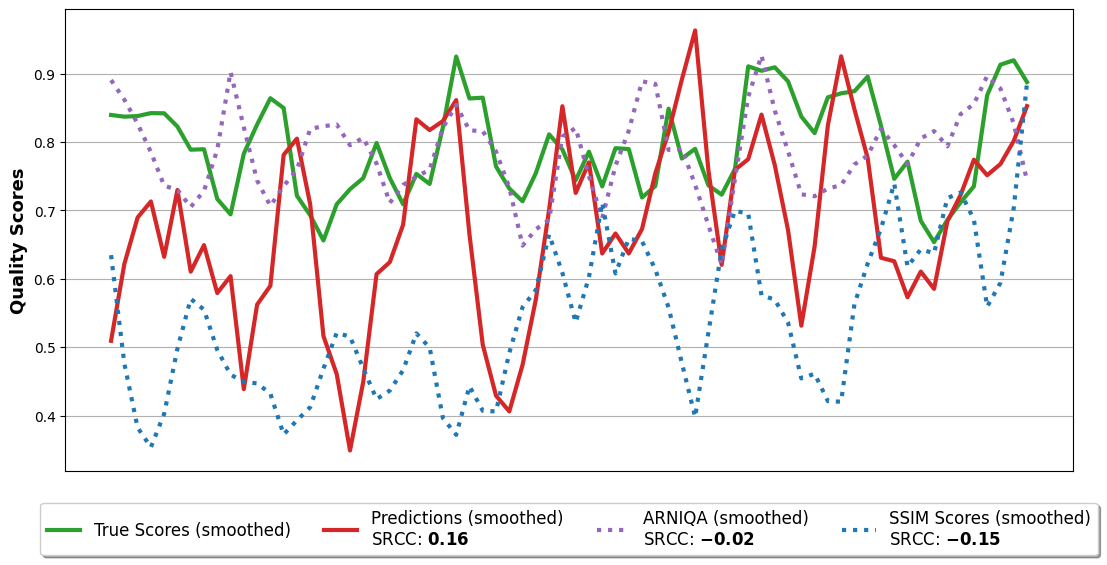

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from scipy.stats import spearmanr
from matplotlib.lines import Line2D

# Calculate SRCC values
srcc_ssim, _ = spearmanr(ssim, actual_scores)
srcc_synthetic, _ = spearmanr(synthetic_scores, actual_scores)
srcc_arniqa, _ = spearmanr(arniqa, actual_scores)

# Smooth the data using Savitzky-Golay filter
window_length = 7  # Choose an odd window length
polyorder = 2  # Polynomial order for the filter

smoothed_actual = savgol_filter(actual_scores, window_length, polyorder)
smoothed_synthetic = savgol_filter(synthetic_scores, window_length, polyorder)
smoothed_ssim = savgol_filter(ssim, window_length, polyorder)
smoothed_arniqa = savgol_filter(arniqa, window_length, polyorder)

# Plotting the original and smoothed data
plt.figure(figsize=(13, 6))
plt.plot(smoothed_actual, color='tab:green', label='True Scores (smoothed)', linestyle='-', linewidth=3)
plt.plot(smoothed_synthetic, color='tab:red', label='Predictions (smoothed)', linestyle='-', linewidth=3)
plt.plot(smoothed_arniqa, color='tab:purple', label='ARNIQA (smoothed)', linestyle=':', linewidth=3)
plt.plot(smoothed_ssim, color='tab:blue', label='SSIM Scores (smoothed)', linestyle=':', linewidth=3)

# Create custom legend handles
handles = [
    Line2D([0], [0], color='tab:green', linestyle='-', linewidth=3),
    Line2D([0], [0], color='tab:red', linestyle='-', linewidth=3),
    Line2D([0], [0], color='tab:purple', linestyle=':', linewidth=3),
    Line2D([0], [0], color='tab:blue', linestyle=':', linewidth=3),
]
labels = [
    f'True Scores (smoothed)',
    f'Predictions (smoothed)\nSRCC: $\\mathbf{{{srcc_synthetic:.2f}}}$',
    f'ARNIQA (smoothed)\nSRCC: $\\mathbf{{{srcc_arniqa:.2f}}}$',
    f'SSIM Scores (smoothed)\nSRCC: $\\mathbf{{{srcc_ssim:.2f}}}$',
]

# Add the custom legend with SRCC values
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4, fontsize=12)

# Labels and legend
plt.ylabel('Quality Scores', fontsize=13, fontweight='bold')
plt.grid(True)
plt.xticks([])

# Show plot
plt.show()

In [11]:
import pandas as pd
import numpy as np
import json
import os

root = '../datas/test_200'
image_paths = [os.path.join(root, filename) for filename in os.listdir(root) if filename.endswith(('.png', '.jpg', 'jpeg'))]

with open(os.path.join(root, "scores.json"), "r") as json_file:
    scores_data = json.load(json_file)
criteria_order = ['background', 'lighting', 'focus', 'orientation', 'color_calibration', 'resolution', 'field_of_view']
test_scores = []
for img_path in image_paths:
    filename = os.path.basename(img_path)
    test_scores.append([scores_data.get(filename, {}).get(key, 0.0) for key in criteria_order])
actual = np.array(test_scores, dtype=np.float32)
df2 = pd.read_csv('../src/csv/test_200_ARNIQA.csv')
df3 = pd.read_csv('../src/csv/test_200_pred.csv')
df = pd.merge(df2, df3, on='image_path')

def weighted_average_with_emphasis(scores):
    # Define multipliers for the distortions
    multipliers = np.array([0.5, 1, 1.5, 0.5, 1, 1.5, 0.5])  # Adjust these values as needed

    # Apply the multipliers to the scores
    adjusted_scores = scores * multipliers
    
    # Calculate weights based on the adjusted severity scores
    weights = adjusted_scores ** 2  
    sum_weights = weights.sum()
    
    if sum_weights == 0:
        return 0  # or you can choose another default value
    
    weights /= sum_weights
    return np.dot(weights, adjusted_scores)

# weighted average score
def weighted_average_with_emphasis1(scores):
    weights = scores ** 2  # weights based on severity
    sum_weights = weights.sum()
    
    if sum_weights == 0:
        return 0  # or you can choose another default value
    
    weights /= sum_weights
    return np.dot(weights, scores)

actual_scores = np.apply_along_axis(weighted_average_with_emphasis1, 1, actual)
synthetic_scores = synthetic.apply(lambda row: weighted_average_with_emphasis(row), axis=1)

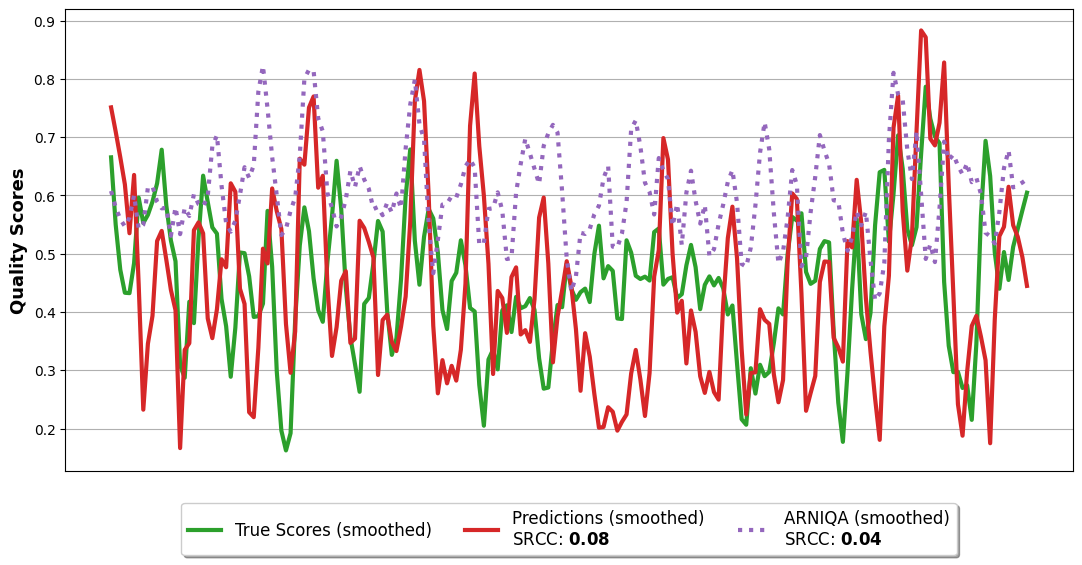

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from scipy.stats import spearmanr
from matplotlib.lines import Line2D

# Calculate SRCC values
srcc_synthetic, _ = spearmanr(synthetic_scores, actual_scores)
srcc_arniqa, _ = spearmanr(arniqa, actual_scores)

# Smooth the data using Savitzky-Golay filter
window_length = 7  # Choose an odd window length
polyorder = 2  # Polynomial order for the filter

smoothed_actual = savgol_filter(actual_scores, window_length, polyorder)
smoothed_synthetic = savgol_filter(synthetic_scores, window_length, polyorder)
smoothed_arniqa = savgol_filter(arniqa, window_length, polyorder)

# Plotting the original and smoothed data
plt.figure(figsize=(13, 6))
plt.plot(smoothed_actual, color='tab:green', label='True Scores (smoothed)', linestyle='-', linewidth=3)
plt.plot(smoothed_synthetic, color='tab:red', label='Predictions (smoothed)', linestyle='-', linewidth=3)
plt.plot(smoothed_arniqa, color='tab:purple', label='ARNIQA (smoothed)', linestyle=':', linewidth=3)

# Create custom legend handles
handles = [
    Line2D([0], [0], color='tab:green', linestyle='-', linewidth=3),
    Line2D([0], [0], color='tab:red', linestyle='-', linewidth=3),
    Line2D([0], [0], color='tab:purple', linestyle=':', linewidth=3)
]
labels = [
    f'True Scores (smoothed)',
    f'Predictions (smoothed)\nSRCC: $\\mathbf{{{srcc_synthetic:.2f}}}$',
    f'ARNIQA (smoothed)\nSRCC: $\\mathbf{{{srcc_arniqa:.2f}}}$'
]

# Add the custom legend with SRCC values
plt.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=3, fontsize=12)

# Labels and legend
plt.ylabel('Quality Scores', fontsize=13, fontweight='bold')
plt.grid(True)
plt.xticks([])

# Show plot
plt.show()